In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
file1 = pd.read_csv(r'HR_comma_sep.csv')
file1.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [7]:
file1.shape

(14999, 10)

In [14]:
file1.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(file1[['satisfaction_level','last_evaluation','number_project']],file1.left,test_size=0.2)

In [21]:
x_train.head(10)

,satisfaction_level,last_evaluation,number_project
4111,0.13,1.00,6
7526,1.00,0.56,3
11503,0.64,0.63,3
6127,0.76,0.64,4
1175,0.78,0.71,4
14093,0.60,0.45,3
8368,0.85,0.68,3
4274,0.59,0.79,4
13813,0.59,0.50,2
14229,0.45,0.51,2


In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
model = LogisticRegression()

In [26]:
model.fit(x_train,y_train)

C:\Users\aditya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
x_test.head(1)

,satisfaction_level,last_evaluation,number_project
8309,0.97,0.63,5


In [28]:
y_test.head(1)

8309    0
Name: left, dtype: int64

In [29]:
model.predict(x_test)

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [30]:
print(y_test)

8309     0
10322    0
11509    0
3648     0
8022     0
        ..
13021    0
4699     0
13018    0
1710     1
1235     1
Name: left, Length: 3000, dtype: int64


In [32]:
model.score(x_test,y_test)

0.782

In [36]:
model.predict_proba(x_test)

array([[0.96106017, 0.03893983],
       [0.92379411, 0.07620589],
       [0.85982443, 0.14017557],
       ...,
       [0.92421772, 0.07578228],
       [0.36207917, 0.63792083],
       [0.60422469, 0.39577531]])

In [38]:
from sklearn.preprocessing import LabelEncoder
salary = LabelEncoder()
file1['salary_in_number'] = salary.fit_transform(file1['salary'])

In [39]:
file1.head(1)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,salary_in_number
0,0.38,0.53,2,157,3,0,1,0,sales,low,1


In [40]:
file1['salary_in_number'].value_counts()

1    7316
2    6446
0    1237
Name: salary_in_number, dtype: int64

In [41]:
import seaborn as sns


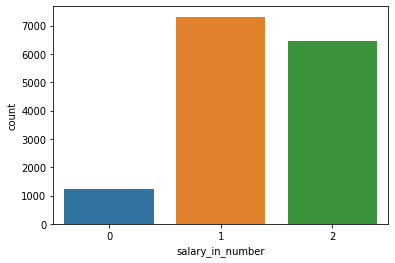

In [42]:
sns.countplot(file1['salary_in_number'])